## `1.` Importing The Packages and Reading The Data

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.svm import SVC

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
df = pd.read_csv('../content/drive/MyDrive/Datasets/customer.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NaN,Yes,No,NaN,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NaN,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,NaN,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,NaN,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NaN,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## `2.` Cleaning The Data

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7000 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            6896 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [74]:
df.isnull().sum()

customerID            0
gender                0
SeniorCitizen        43
Partner               0
Dependents            0
tenure              147
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 0
dtype: int64

In [75]:
df.tenure.describe()

count    6896.000000
mean       33.041473
std        24.382260
min         1.000000
25%        10.000000
50%        30.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64

In [76]:
df.SeniorCitizen.value_counts()

0.0    5858
1.0    1142
Name: SeniorCitizen, dtype: int64

In [77]:
df.SeniorCitizen.fillna(1, inplace = True)

In [78]:
df.tenure.fillna(df.tenure.mean(), inplace = True)

- ### The Data is cleaned and is ready to be encoded.

## `3.` Categorical Encoding Using LabelEncoder

In [79]:
df.drop('customerID', axis=1, inplace = True)
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [80]:
encoding_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
encoder = {}
for column in encoding_columns:
    encoder[column] = LabelEncoder()
    df[column] = encoder[column].fit_transform(df[column])

In [81]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1.0,1,0,33.041473,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,1.0,0,0,34.000000,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,1.0,0,0,2.000000,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,1.0,0,0,45.000000,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,1.0,0,0,2.000000,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


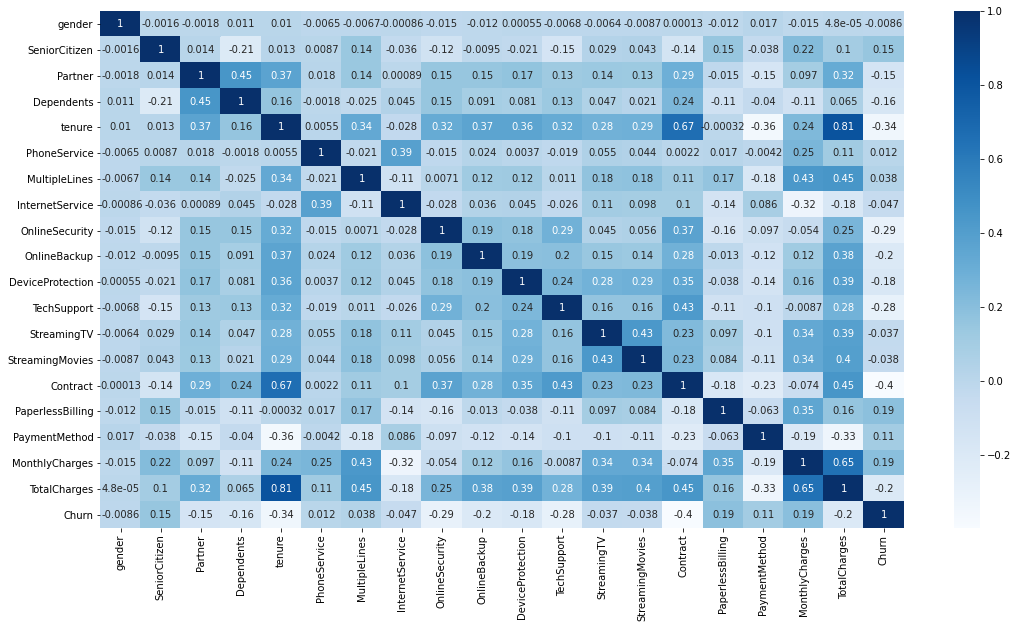

In [82]:
plt.figure(figsize=(18,9.5))
sns.heatmap(df.corr(),cbar = True, annot =True, cmap="Blues");

- ### The Data is encoded. 

## `4.` Feature Selection

In [83]:
from copy import copy

columns = ['Partner', 'Dependents', 'SeniorCitizen', 'tenure', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',  'Churn']
df_2 = copy(df[columns])

In [84]:
df_2.head()

,Partner,Dependents,SeniorCitizen,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,1,0,1.0,33.041473,0,2,0,0,0,1,29.85,29.85,0
1,0,0,1.0,34.000000,2,0,2,0,1,0,56.95,1889.50,0
2,0,0,1.0,2.000000,2,2,0,0,0,1,53.85,108.15,1
3,0,0,1.0,45.000000,2,0,2,2,1,0,42.30,1840.75,0
4,0,0,1.0,2.000000,0,0,0,0,0,1,70.70,151.65,1


## `5.` Scaling The Data

### Normalizing The Data

In [85]:
def normalize_columns(column):
    return (df_2[column] - df_2[column].min()) / (df_2[column].max() - df_2[column].min())

In [86]:
for column in columns:
    df_2[column] = normalize_columns(column)

In [87]:
df_2.head()

,Partner,Dependents,SeniorCitizen,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,1.0,0.0,1.0,0.451288,0.0,1.0,0.0,0.0,0.0,1.0,0.115423,0.001275,0.0
1,0.0,0.0,1.0,0.464789,1.0,0.0,1.0,0.0,0.5,0.0,0.385075,0.215867,0.0
2,0.0,0.0,1.0,0.014085,1.0,1.0,0.0,0.0,0.0,1.0,0.354229,0.010310,1.0
3,0.0,0.0,1.0,0.619718,1.0,0.0,1.0,1.0,0.5,0.0,0.239303,0.210241,0.0
4,0.0,0.0,1.0,0.014085,0.0,0.0,0.0,0.0,0.0,1.0,0.521891,0.015330,1.0


In [88]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Partner           7043 non-null   float64
 1   Dependents        7043 non-null   float64
 2   SeniorCitizen     7043 non-null   float64
 3   tenure            7043 non-null   float64
 4   OnlineSecurity    7043 non-null   float64
 5   OnlineBackup      7043 non-null   float64
 6   DeviceProtection  7043 non-null   float64
 7   TechSupport       7043 non-null   float64
 8   Contract          7043 non-null   float64
 9   PaperlessBilling  7043 non-null   float64
 10  MonthlyCharges    7043 non-null   float64
 11  TotalCharges      7043 non-null   float64
 12  Churn             7043 non-null   float64
dtypes: float64(13)
memory usage: 715.4 KB


- ### The data is normalized.

## `6.` Splitting The Data

In [89]:
X = df_2.drop('Churn', axis=1).values
Y = df_2.Churn.values

In [90]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=30)

In [91]:
x_train.shape

(4930, 12)

In [92]:
x_test.shape

(2113, 12)

## `7.` Creating The Model

- ## SVM

In [93]:
from sklearn.model_selection import GridSearchCV
svm_grid={'C': [0.1, 1, 10, 100, 200, 300, 500],  
              'gamma': [0.1, 0.01,0.3,0.5], 
              'gamma':['scale', 'auto'],
              'kernel': ['rbf', 'linear'],
              'probability':[True]}

In [94]:
svm_classifier = GridSearchCV(estimator=SVC(), param_grid=svm_grid, cv = 3, n_jobs=-1,verbose=1)
svm_classifier.fit(x_train, y_train)

# Summarize results
print("Best: %f using %s" % (svm_classifier.best_score_, svm_classifier.best_params_))

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:  4.8min finished


Best: 0.800203 using {'C': 100, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True}


In [96]:
svm_predictions = svm_classifier.predict(x_test) 
   
# print classification report 
print(metrics.classification_report(y_test, svm_predictions)) 

              precision    recall  f1-score   support

         0.0       0.80      0.92      0.85      1499
         1.0       0.68      0.44      0.53       614

    accuracy                           0.78      2113
   macro avg       0.74      0.68      0.69      2113
weighted avg       0.77      0.78      0.76      2113



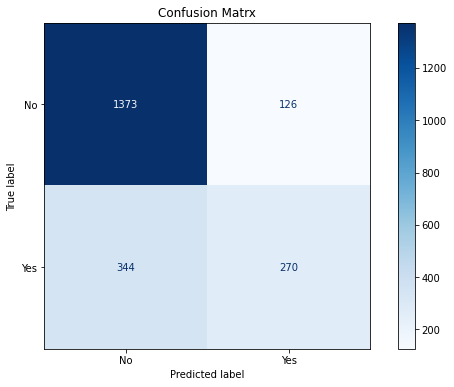

In [97]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')
chart = metrics.plot_confusion_matrix(svm_classifier, x_test, y_test, display_labels= encoder['Churn'].classes_, ax = ax, cmap="Blues", values_format = '.0f')
chart.confusion_matrix;

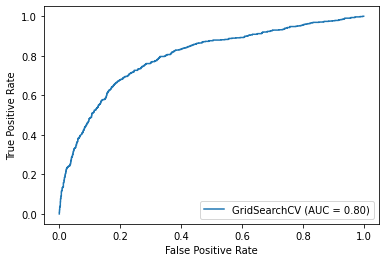

In [98]:
metrics.plot_roc_curve(svm_classifier, x_test, y_test)

- ## Logistic Regression

In [99]:
lr_grid = {'penalty': ['l1', 'l2'],
           'C':[0.001,.009,0.01,.09,1,5,10,25],
          'solver': ['liblinear']}

In [100]:
from sklearn.linear_model import LogisticRegression

lr_classifier = GridSearchCV(estimator=LogisticRegression(), param_grid=lr_grid, cv = 3, n_jobs=-1,verbose=1)
lr_classifier.fit(x_train, y_train)

# Summarize results
print("Best: %f using %s" % (lr_classifier.best_score_, lr_classifier.best_params_))

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best: 0.799595 using {'C': 5, 'penalty': 'l2', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.4s finished


In [101]:
lr_predictions = lr_classifier.predict(x_test) 
   
# print classification report 
print(metrics.classification_report(y_test, lr_predictions)) 

              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85      1499
         1.0       0.67      0.50      0.57       614

    accuracy                           0.78      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.77      0.78      0.77      2113



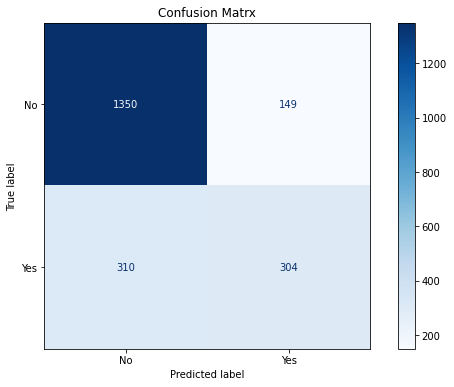

In [102]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')
chart = metrics.plot_confusion_matrix(lr_classifier, x_test, y_test, display_labels= encoder['Churn'].classes_, ax = ax, cmap="Blues", values_format = '.0f')
chart.confusion_matrix;

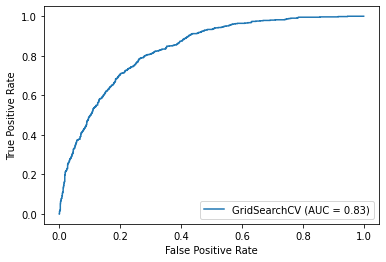

In [103]:
metrics.plot_roc_curve(lr_classifier, x_test, y_test)

- ## KNN

In [104]:
knn_grid = {'n_neighbors':[4,5,6,7],
              'leaf_size':[1,3,5],
              'algorithm':['auto', 'kd_tree'],
              'n_jobs':[-1]}

In [105]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = GridSearchCV(estimator= KNeighborsClassifier(), param_grid=knn_grid, cv = 3, n_jobs=-1,verbose=1)
knn_classifier.fit(x_train, y_train)

# Summarize results
print("Best: %f using %s" % (knn_classifier.best_score_, knn_classifier.best_params_))

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.7s


Best: 0.780326 using {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 4}


[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   14.2s finished


In [106]:
knn_predictions = knn_classifier.predict(x_test) 
   
# print classification report 
print(metrics.classification_report(y_test, knn_predictions)) 

              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85      1499
         1.0       0.68      0.34      0.45       614

    accuracy                           0.76      2113
   macro avg       0.73      0.64      0.65      2113
weighted avg       0.75      0.76      0.73      2113



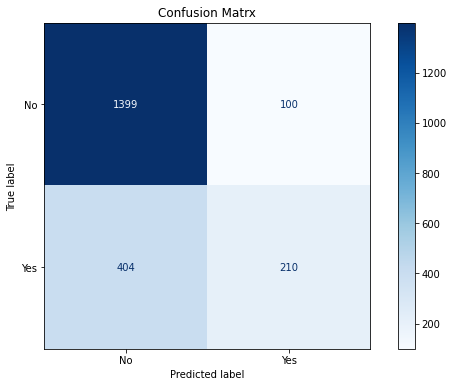

In [107]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')
chart = metrics.plot_confusion_matrix(knn_classifier, x_test, y_test, display_labels= encoder['Churn'].classes_, ax = ax, cmap="Blues",  values_format = '.0f')
chart.confusion_matrix;

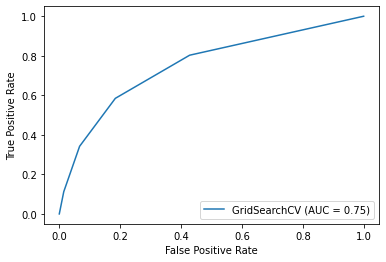

In [108]:
metrics.plot_roc_curve(knn_classifier, x_test, y_test)

- ## Decision Tree

In [109]:
dt_grid = {
 'criterion':['gini','entropy'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 250, 300, 500, 1000, None],
 'max_features': ['auto', 'sqrt']}

In [110]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = GridSearchCV(estimator= DecisionTreeClassifier(), param_grid=dt_grid, cv = 3, n_jobs=-1,verbose=1)
dt_classifier.fit(x_train, y_train) 

# Summarize results
print("Best: %f using %s" % (dt_classifier.best_score_, dt_classifier.best_params_))

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best: 0.770385 using {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt'}


[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:    1.3s finished


In [111]:
dt_predictions = dt_classifier.predict(x_test) 
   
# print classification report 
print(metrics.classification_report(y_test, dt_predictions))

              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84      1499
         1.0       0.61      0.48      0.53       614

    accuracy                           0.76      2113
   macro avg       0.71      0.68      0.69      2113
weighted avg       0.75      0.76      0.75      2113



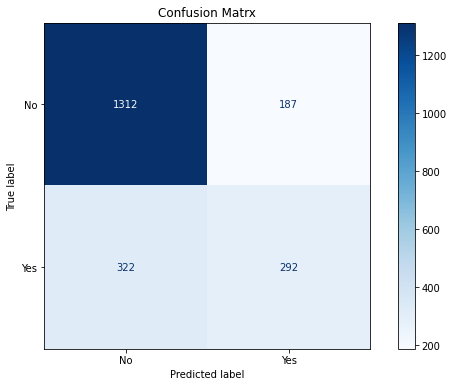

In [112]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')
chart = metrics.plot_confusion_matrix(dt_classifier, x_test, y_test, display_labels= encoder['Churn'].classes_, ax = ax, cmap="Blues",  values_format = '.0f')
chart.confusion_matrix;

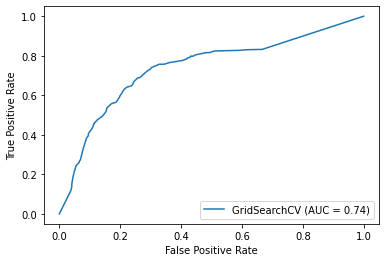

In [113]:
metrics.plot_roc_curve(dt_classifier, x_test, y_test)

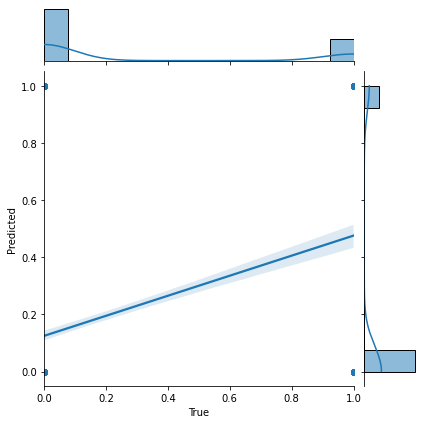

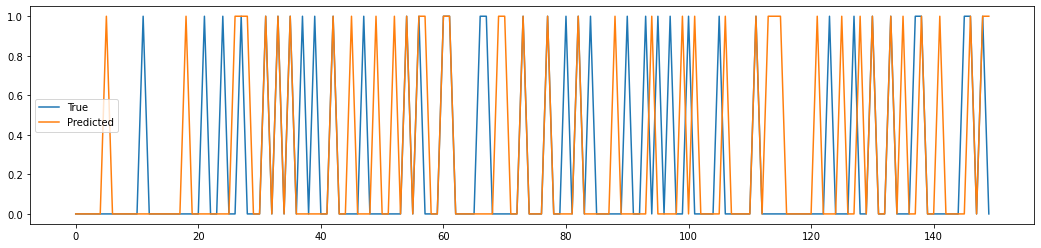

In [114]:
y_pred = dt_classifier.predict(x_test)
test_dt = pd.DataFrame({'Predicted':y_pred,'True':y_test})

sns.jointplot(x='True', y='Predicted', data=test_dt, kind='reg')
fig= plt.figure(figsize=(18,4))
test_dt.reset_index(inplace = True)
test_dt.drop(['index'], axis=1, inplace = True)
plt.plot(test_dt[:150])
plt.legend(['True','Predicted']);

- ## Random Forest

In [115]:
rf_grid = {
 'max_depth': [10, 20, 30, None],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [200, 400, 600, 800]}

In [116]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = GridSearchCV(estimator= RandomForestClassifier(), param_grid=rf_grid, cv = 3, n_jobs=-1,verbose=1)
rf_classifier.fit(x_train, y_train) 

# Summarize results
print("Best: %f using %s" % (rf_classifier.best_score_, rf_classifier.best_params_))

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  2.9min finished


Best: 0.808317 using {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 800}


In [117]:
rf_predictions = rf_classifier.predict(x_test) 
   
# print classification report 
print(metrics.classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86      1499
         1.0       0.69      0.46      0.55       614

    accuracy                           0.78      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.77      0.78      0.77      2113



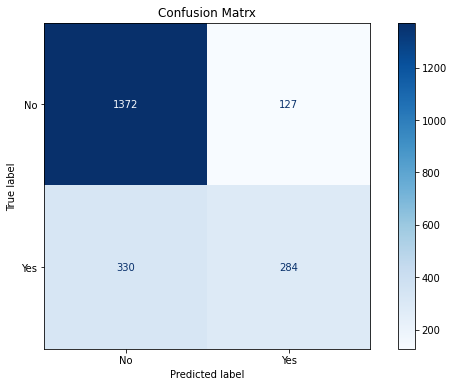

In [118]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')
chart = metrics.plot_confusion_matrix(rf_classifier, x_test, y_test, display_labels= encoder['Churn'].classes_, ax = ax, cmap="Blues",  values_format = '.0f')
chart.confusion_matrix;

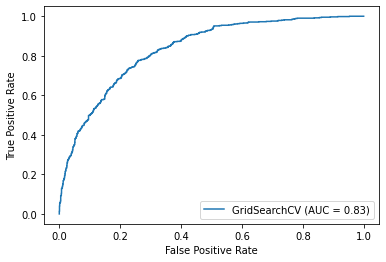

In [119]:
metrics.plot_roc_curve(rf_classifier, x_test, y_test)

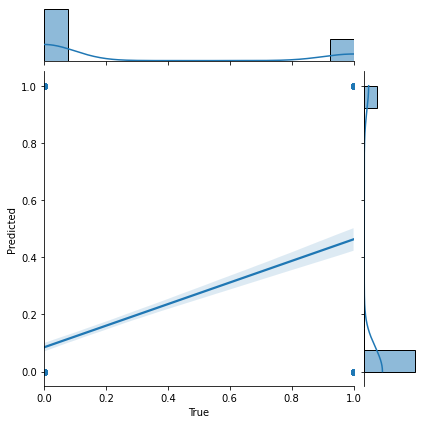

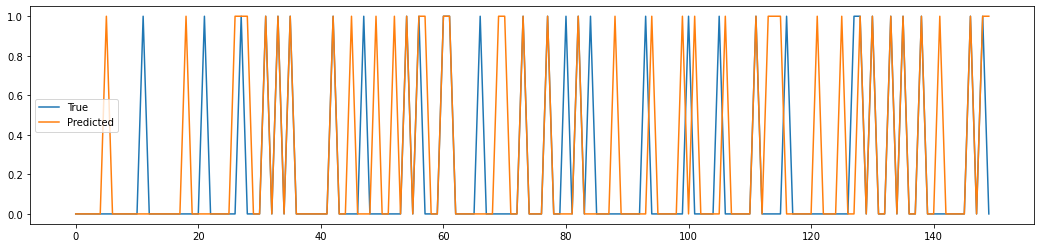

In [120]:
y_pred = rf_classifier.predict(x_test)
test_rf = pd.DataFrame({'Predicted':y_pred,'True':y_test})

sns.jointplot(x='True', y='Predicted', data=test_rf, kind='reg')
fig = plt.figure(figsize=(18,4))
test_rf.reset_index(inplace = True)
test_rf.drop(['index'], axis=1, inplace = True)
plt.plot(test_rf[:150])
plt.legend(['True','Predicted']);

- ## XGBoost Ensemble Algorithm

In [121]:
xgb_grid = {
            'min_child_weight': [1, 5, 10],
            'gamma': [0.5, 1, 1.5],
            'subsample': [0.6, 0.8],
            'colsample_bytree': [0.6, 0.8],
            'max_depth': [3, 4, 5]
        }

In [122]:

xgb_classifier =  GridSearchCV(estimator= XGBClassifier(), param_grid=xgb_grid, cv = 3, n_jobs=-1,verbose=1)
xgb_classifier.fit(x_train, y_train) 

# Summarize results
print("Best: %f using %s" % (xgb_classifier.best_score_, xgb_classifier.best_params_))

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  1.1min finished


Best: 0.811764 using {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.6}


In [123]:
xgb_predictions = xgb_classifier.predict(x_test) 
   
# print classification report 
print(metrics.classification_report(y_test, xgb_predictions))

              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86      1499
         1.0       0.70      0.48      0.57       614

    accuracy                           0.79      2113
   macro avg       0.75      0.70      0.71      2113
weighted avg       0.78      0.79      0.77      2113



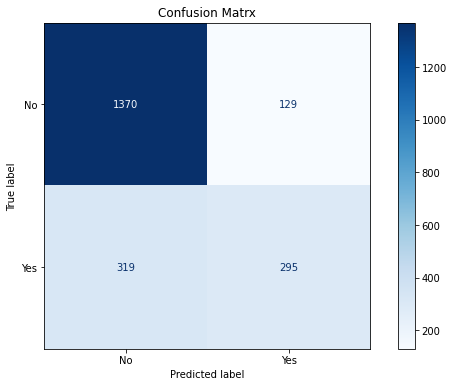

In [124]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')
chart = metrics.plot_confusion_matrix(xgb_classifier, x_test, y_test, display_labels= encoder['Churn'].classes_, ax = ax, cmap="Blues",  values_format = '.0f')
chart.confusion_matrix;

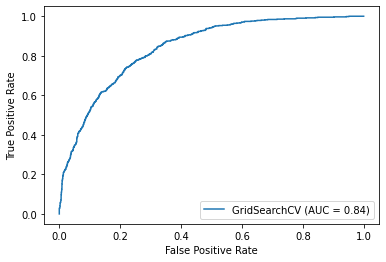

In [125]:
metrics.plot_roc_curve(xgb_classifier, x_test, y_test)

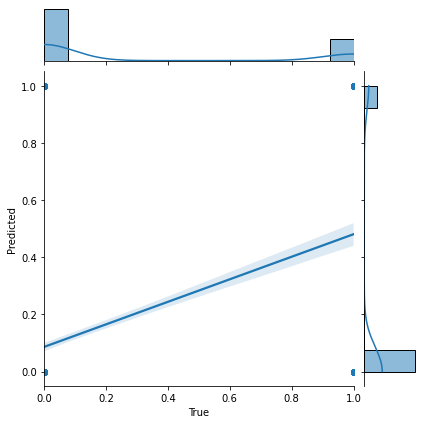

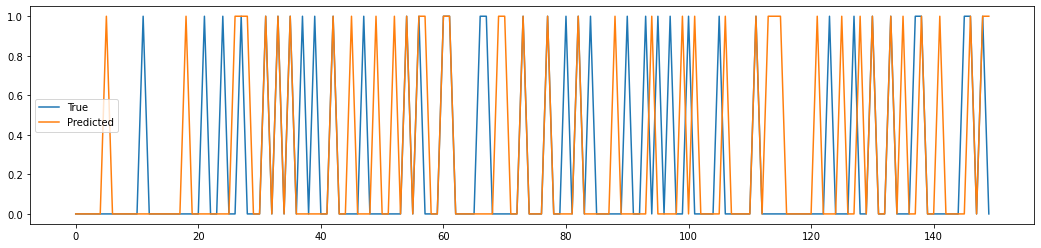

In [126]:
y_pred = xgb_classifier.predict(x_test)
test = pd.DataFrame({'Predicted':y_pred,'True':y_test})

sns.jointplot(x='True', y='Predicted', data=test, kind='reg')
fig= plt.figure(figsize=(18,4))
test.reset_index(inplace = True)
test.drop(['index'], axis=1, inplace = True)
plt.plot(test_dt[:150])
plt.legend(['True','Predicted']);

- ## ADA Boost Classifier

In [127]:
ada_grid = {'n_estimators':[50,100,200,500,1000],'learning_rate':[.01,0.01,.1,0.3,0.5]}

In [128]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier = GridSearchCV(estimator= AdaBoostClassifier(), param_grid=ada_grid, cv = 3, n_jobs=-1,verbose=1)
ada_classifier.fit(x_train, y_train)

# Summarize results
print("Best: %f using %s" % (ada_classifier.best_score_, ada_classifier.best_params_))

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   58.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  1.7min finished


Best: 0.810345 using {'learning_rate': 0.1, 'n_estimators': 1000}


In [129]:
ada_predictions = ada_classifier.predict(x_test) 
   
# print classification report 
print(metrics.classification_report(y_test, ada_predictions))

              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      1499
         1.0       0.68      0.50      0.58       614

    accuracy                           0.79      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.78      0.79      0.78      2113



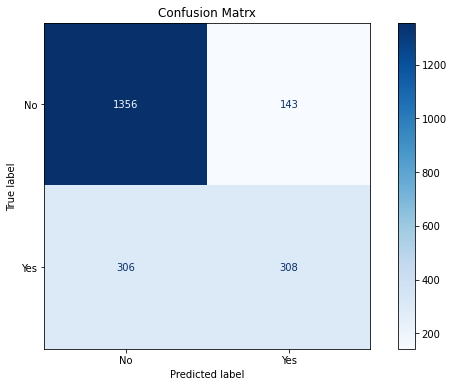

In [130]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')
chart = metrics.plot_confusion_matrix(ada_classifier, x_test, y_test, display_labels= encoder['Churn'].classes_, ax = ax, cmap="Blues",  values_format = '.0f')
chart.confusion_matrix;

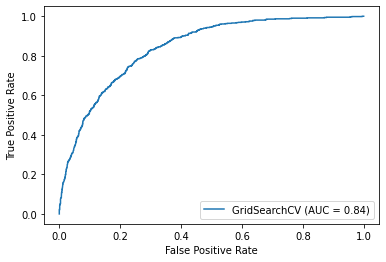

In [131]:
metrics.plot_roc_curve(ada_classifier, x_test, y_test)

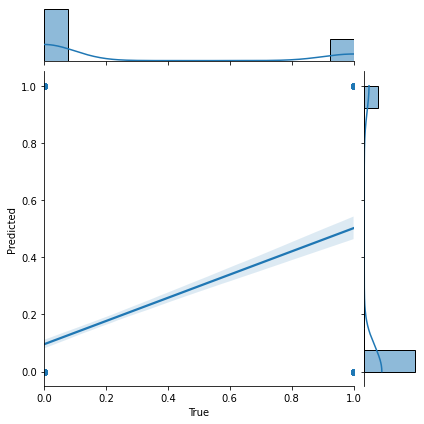

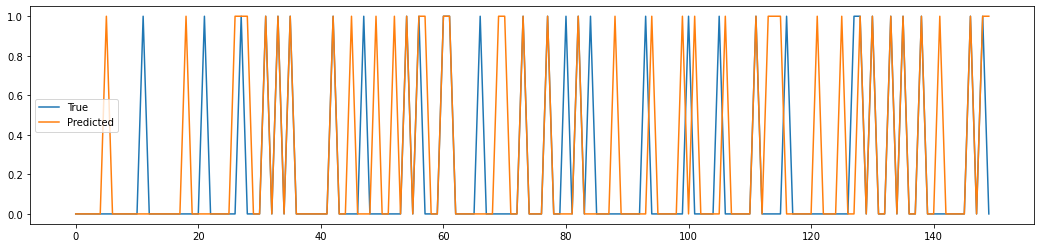

In [132]:
y_pred = ada_classifier.predict(x_test)
test = pd.DataFrame({'Predicted':y_pred,'True':y_test})

sns.jointplot(x='True', y='Predicted', data=test, kind='reg')
fig = plt.figure(figsize=(18,4))
test.reset_index(inplace = True)
test.drop(['index'], axis=1, inplace = True)
plt.plot(test_rf[:150])
plt.legend(['True','Predicted']);

- ## Voting Classifier

In [133]:
from sklearn.ensemble import VotingClassifier

In [134]:
vote_grid = [{'lr__C':[1,2],'gboost__n_estimator':[10,20]}]
v_classifier = VotingClassifier(
          estimators=[('lr',LogisticRegression()), ('gboost',XGBClassifier()),]
          , voting='soft')

In [135]:
#dt_classifier = tree.DecisionTreeClassifier(max_depth=8, max_features=11)
#svm_classifier = SVC(kernel='rbf', probability=True)

In [136]:
vote_classifier = GridSearchCV(estimator= v_classifier, param_grid=vote_grid, cv = 3, n_jobs=-1,verbose=1)
vote_classifier.fit(x_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    2.4s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=VotingClassifier(estimators=[('lr',
                                                     LogisticRegression(C=1.0,
                                                                        class_weight=None,
                                                                        dual=False,
                                                                        fit_intercept=True,
                                                                        intercept_scaling=1,
                                                                        l1_ratio=None,
                                                                        max_iter=100,
                                                                        multi_class='auto',
                                                                        n_jobs=None,
                                                                        penalty='l2',
                              

In [137]:
vote_predictions = vote_classifier.predict(x_test) 
   
# print classification report 
print(metrics.classification_report(y_test, vote_predictions))

              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86      1499
         1.0       0.69      0.47      0.56       614

    accuracy                           0.78      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.77      0.78      0.77      2113



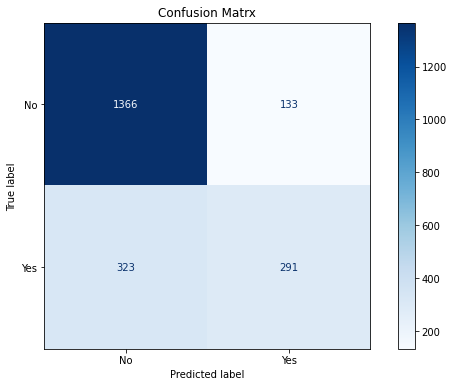

In [138]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')
chart = metrics.plot_confusion_matrix(vote_classifier, x_test, y_test, display_labels= encoder['Churn'].classes_, ax = ax, cmap="Blues",  values_format = '.0f')
chart.confusion_matrix;

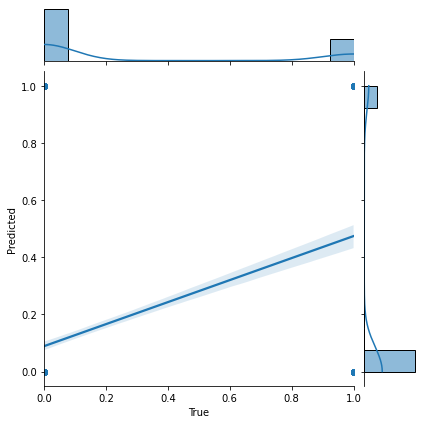

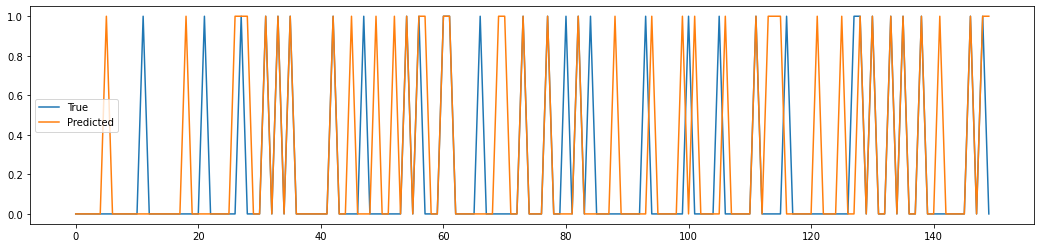

In [139]:
y_pred = vote_classifier.predict(x_test)
test = pd.DataFrame({'Predicted':y_pred,'True':y_test})

sns.jointplot(x='True', y='Predicted', data=test, kind='reg')
fig = plt.figure(figsize=(18,4))
test.reset_index(inplace = True)
test.drop(['index'], axis=1, inplace = True)
plt.plot(test_rf[:150])
plt.legend(['True','Predicted']);

## New User Prediction

In [140]:
#columns = ['Partner', 'Dependents', 'SeniorCitizen', 'tenure', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',  'Churn']

new_user =['Yes', 'Yes', 1, 15, 'No', 'No', 'No', 'Yes', 'One year', 'Yes', 50, 500] 

In [141]:
new_user[0] = encoder['Partner'].transform([new_user[0]])[0]
new_user[1] = encoder['Dependents'].transform([new_user[1]])[0]
new_user[4] = encoder['OnlineSecurity'].transform([new_user[4]])[0]
new_user[5] = encoder['OnlineBackup'].transform([new_user[5]])[0]
new_user[6] = encoder['DeviceProtection'].transform([new_user[6]])[0]
new_user[7] = encoder['TechSupport'].transform([new_user[7]])[0]
new_user[8] = encoder['Contract'].transform([new_user[8]])[0]
new_user[9] = encoder['PaperlessBilling'].transform([new_user[9]])[0]

In [142]:
new_user[3] = (new_user[3] - df.tenure.min())/(df.tenure.max() - df.tenure.min())
new_user[10] = (new_user[10] - df.MonthlyCharges.min()) / (df.MonthlyCharges.max() - df.MonthlyCharges.min())
new_user[11] = (new_user[10] - df.TotalCharges.min()) / (df.TotalCharges.max() - df.TotalCharges.min())

In [143]:
print(new_user)

[1, 1, 1, 0.19718309859154928, 0, 0, 0, 2, 1, 1, 0.31592039800995025, -0.0021329424881133224]


In [144]:
ada_classifier.predict_proba([new_user])

array([[0.51166163, 0.48833837]])

In [145]:
vote_classifier.predict_proba([new_user])

array([[0.89282104, 0.10717897]])

In [146]:
xgb_classifier.predict_proba([new_user])

array([[0.8403421, 0.1596579]], dtype=float32)

In [147]:
knn_classifier.predict_proba([new_user])

array([[0.75, 0.25]])

In [148]:
lr_classifier.predict_proba([new_user])

array([[0.92567685, 0.07432315]])

In [149]:
svm_classifier.predict_proba([new_user])

array([[0.57710479, 0.42289521]])

In [150]:
dt_classifier.predict_proba([new_user])

array([[1., 0.]])

In [151]:
rf_classifier.predict_proba([new_user])

array([[0.76293939, 0.23706061]])